# Проект. Основы машинного обучения.

   
   Сеть фитнес-центров разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

__Цель:__
    
    Провести анализ и подготовить план действий по удержанию клиентов
    
 
__Этапы:__


   - научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
   - сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
   - проанализировать основные признаки, наиболее сильно влияющие на отток;
   - сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:


## Загрузим данные

__Набор данных включает следующие поля:__

Данные клиента за предыдущий до проверки факта оттока месяц:

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
import itertools

In [2]:
df = pd.read_csv('')
df.head(3)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0


In [3]:
df.shape

(4000, 14)

Денные включают в себя сведения о 4000 клиентов, содержат 14 столбцов

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

В данных нет пропусков. Тип данных целые и вещественные числа. 

## Проведем исследовательский анализ данных (EDA)


In [5]:
#поменяем тип данных в столбце с номером месяца на целые числа:

df['Month_to_end_contract'] = df['Month_to_end_contract'].astype('int')

Проверим какие значения встречаются в столбцах с целыми числами:

In [6]:
df['gender'].value_counts()

1    2041
0    1959
Name: gender, dtype: int64

In [7]:
df['Partner'].value_counts()

0    2053
1    1947
Name: Partner, dtype: int64

In [8]:
df['Promo_friends'].value_counts()

0    2766
1    1234
Name: Promo_friends, dtype: int64

In [9]:
df['Phone'].value_counts()

1    3614
0     386
Name: Phone, dtype: int64

In [10]:
df['Contract_period'].value_counts()

1     2207
12     960
6      833
Name: Contract_period, dtype: int64

In [11]:
df['Group_visits'].value_counts()

0    2351
1    1649
Name: Group_visits, dtype: int64

In [12]:
df['Churn'].value_counts()

0    2939
1    1061
Name: Churn, dtype: int64

Отток 1061 человек

In [13]:
df['Age'].value_counts()

29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
18      2
19      2
41      1
Name: Age, dtype: int64

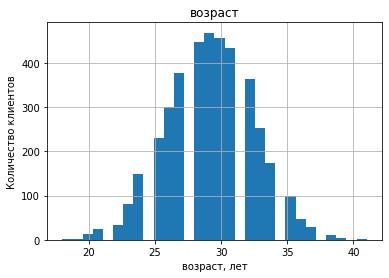

In [14]:
df['Age'].hist(bins=30)
plt.title('возраст')
plt.xlabel('возраст, лет')
plt.ylabel('Количество клиентов')
plt.show()

Средний возраст клиентов 30 лет

In [15]:
df['Month_to_end_contract'].value_counts()

1     2207
6      645
12     524
11     181
5      130
10      82
9       73
4       58
8       38
7       25
3       23
2       14
Name: Month_to_end_contract, dtype: int64

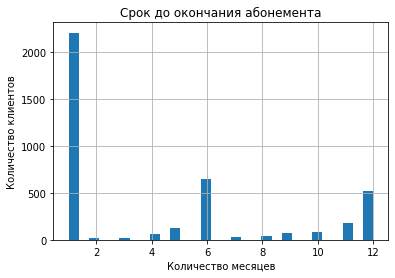

In [16]:
df['Month_to_end_contract'].hist(bins=30)
plt.title('Срок до окончания абонемента')
plt.xlabel('Количество месяцев')
plt.ylabel('Количество клиентов')
plt.show()

Большинство клиентов с картой на месяц

In [17]:
df['Lifetime'].value_counts()

1     843
2     610
3     490
0     487
4     383
5     273
6     220
7     167
8     111
9     100
10     76
12     53
11     48
13     28
15     24
14     24
16     15
17     11
19      7
18      7
20      7
21      5
26      2
24      2
22      2
23      2
27      1
29      1
31      1
Name: Lifetime, dtype: int64

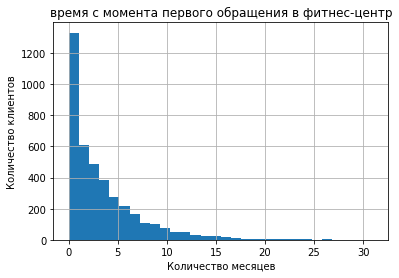

In [18]:
df['Lifetime'].hist(bins=30)
plt.title('время с момента первого обращения в фитнес-центр')
plt.xlabel('Количество месяцев')
plt.ylabel('Количество клиентов')
plt.show()

Большенство новых клиентов

Проверим какие значения встречаются в столбцах с вещественными числами:

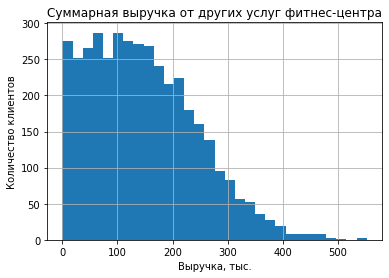

In [19]:
df['Avg_additional_charges_total'].hist(bins=30)
plt.title('Суммарная выручка от других услуг фитнес-центра')
plt.xlabel('Выручка, тыс.')
plt.ylabel('Количество клиентов')
plt.show()

Некоторые клиенты потратили 500 000 на дополнительные услуги, скорее всего это те что посещают зал уже долгое время.

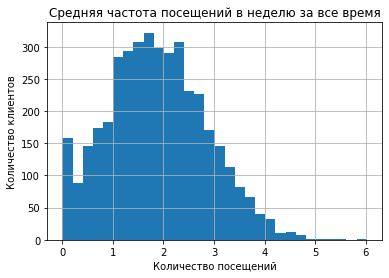

In [20]:
df['Avg_class_frequency_total'].hist(bins=30)
plt.title('Средняя частота посещений в неделю за все время')
plt.xlabel('Количество посещений')
plt.ylabel('Количество клиентов')
plt.show()

На графиках не видно особых выбросов. В основном клиеты посещали зал 1-2 раза. 

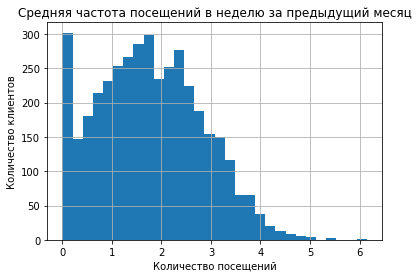

In [21]:
df['Avg_class_frequency_current_month'].hist(bins=30)
plt.title('Средняя частота посещений в неделю за предыдущий месяц')
plt.xlabel('Количество посещений')
plt.ylabel('Количество клиентов')
plt.show()

На графиках не видно особых выбросов. В последнем месяце большое количество клиентов уже не посещали зал. 

In [22]:
#посмотрим средние значения и стандартные отклонения:
df.describe(include=[float])

,Avg_additional_charges_total,Avg_class_frequency_total,Avg_class_frequency_current_month
count,4000.000000,4000.000000,4000.000000
mean,146.943728,1.879020,1.767052
std,96.355602,0.972245,1.052906
min,0.148205,0.000000,0.000000
25%,68.868830,1.180875,0.963003
50%,136.220159,1.832768,1.719574
75%,210.949625,2.536078,2.510336
max,552.590740,6.023668,6.146783


По таблице видно что разницы между средней и медианой почти нет. Но в столбце с суммарной выручкой и частотой посещений за весь период, существует большая разница между средней и стандартным отклонением. Что говорит нам о налии выбросов. 

Выбросы удалять не будим, так как клиенты, которые потратили 500 000 на дополнительные услуги, скорее всего это те что посещают зал уже долгое время, около 3 лет, за такое время возможно потратить большую сумму на доп услуги. 

In [23]:
#посмотрим на средние значения признаков в двух группах — тех, кто ушел и тех, кто остался
avg = df.groupby('Churn').mean()
avg

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


В таблице видно что ушло больше клиентов, у которых контракт скоро заканчивается, также это в основном новые клиенты. Посмотрим эти распределения на графиках.

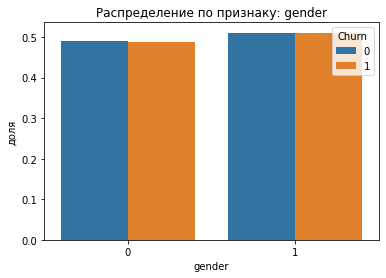

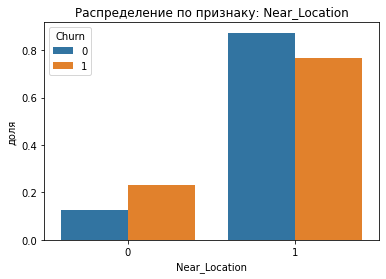

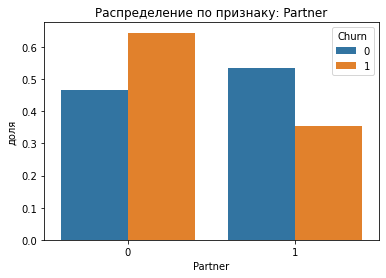

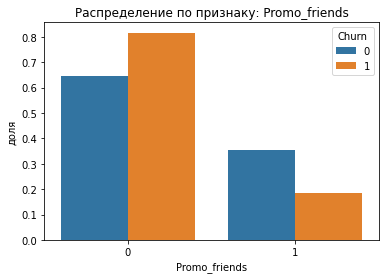

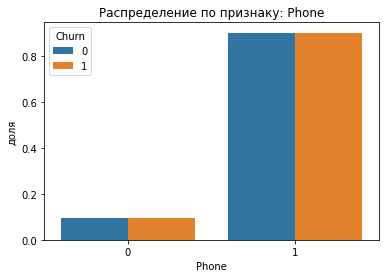

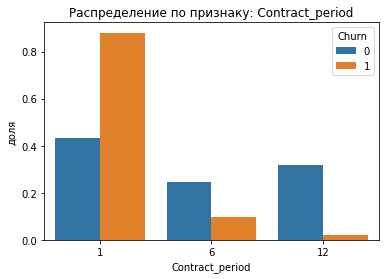

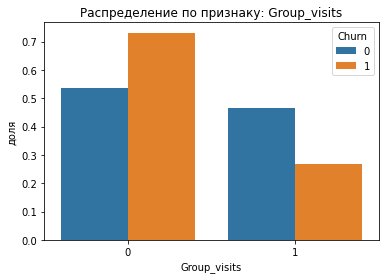

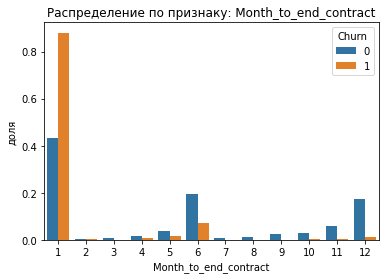

In [24]:
#берем только категориальные и бинарные признаки, и исключаем целевую переменную:
cols = [col for col in df.columns if col != 'Churn' and df[col].nunique() < 13]

#построим попарные столбчатые гистограммы признак-целевая переменная для каждого признака
for col in cols:
    dist = (df.groupby(['Churn', col])
                .size()
                .groupby(level=0)
                .apply(lambda x: x / x.sum())
                .reset_index(name='доля'))

    plt.figure(figsize=(6,4))
    sns.barplot(data = dist, x=col, y='доля', hue='Churn')
    plt.title(f'Распределение по признаку: {col}')
    plt.show()

По графикам видно что пол, наличие телефона, локация, не сильно влияют на решение уйти. А вот сотрудник компании-партнёра клуба меньше бросают клуб. Сильно влияют факторы период контракта и сколько месяцев до его оканчания. 

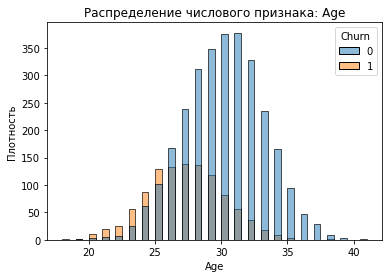

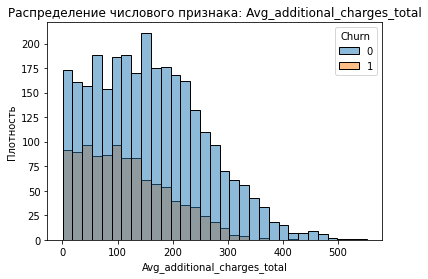

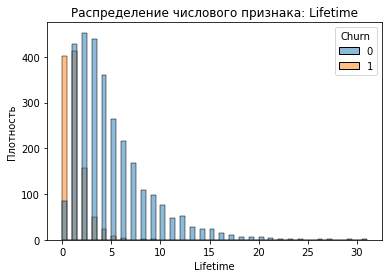

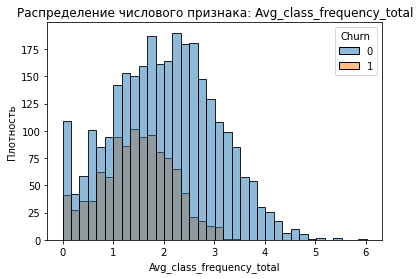

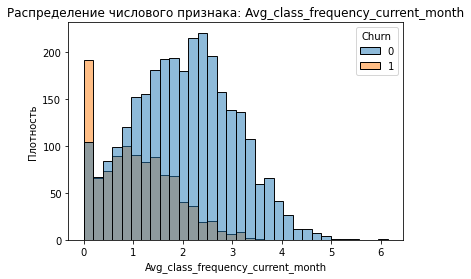

In [25]:
#берем только числовые признаки, и исключаем целевую переменную:
num_cols = [col for col in df.columns if col != 'Churn' and df[col].nunique() >= 13]

#построим попарные столбчатые гистограммы признак-целевая переменная для каждого признака
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data = df, x=col, hue='Churn')
    plt.title(f'Распределение числового признака: {col}')
    plt.xlabel(col)
    plt.ylabel('Плотность')
    plt.show()

По этим графикам видно что покидают клуб люди которые моложе, которые только пришли в клуб. Также те который его посещали 1-2 раза в месяц, и те кто последний месяц не посещали совсем.

In [26]:
#вычисляем матрицу корреляций
cm = df.corr() 

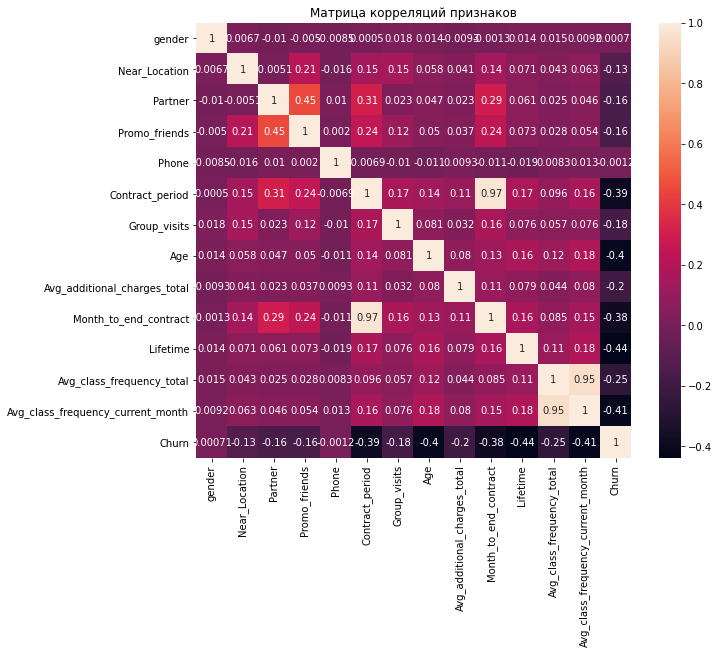

In [27]:
#нарисуем тепловую карту с подписями для матрицы корреляций
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, square=True) 
plt.title('Матрица корреляций признаков')
plt.show()

Исходя из матрицы корреляций можно сказать что есть несколько признаков которые сильно коррелируют с другими:

- 'Month_to_end_contract' -  сильно коррелирует сразу с двумя признаками, 'Lifetime' и 'Contract_period'


- 'Avg_class_frequency_total' и 'Avg_class_frequency_current_month' также сильно коррелируют. Оставим среднюю частоту посещений в неделю за последний месяц, а за все время удалим.

In [28]:
df = df.drop(columns=['Month_to_end_contract', 'Avg_class_frequency_total'])
df.head(3)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.736502,0


## Построим модель прогнозирования оттока клиентов

In [29]:
#разделим данные на признаки (матрица X) и целевую переменную (y)
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [30]:
#разделим модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
# зададим алгоритм логистической регрессией для нашей модели
model_lr = LogisticRegression(solver='liblinear')

# обучим модель
model_lr.fit(X_train,y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
predictions_lr = model_lr.predict(X_test)


In [32]:
# зададим алгоритм случайный лес для нашей модели
model_rf = RandomForestClassifier(n_estimators = 100, random_state = 0)

# обучим модель
model_rf.fit(X_train,y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
predictions_rf = model_rf.predict(X_test)


In [33]:
#подсчет метрик:
def get_metrics(y_true, y_pred):
    return{'Accuracy': accuracy_score(y_true, y_pred),
           'Precision': precision_score(y_true, y_pred),
           'Recall': recall_score(y_true, y_pred)}

metrics_lr = get_metrics(y_test, predictions_lr)
metrics_lr

{'Accuracy': 0.89625,
 'Precision': 0.7918781725888325,
 'Recall': 0.7878787878787878}

In [34]:
metrics_rf = get_metrics(y_test, predictions_rf)
metrics_rf

{'Accuracy': 0.89625,
 'Precision': 0.8142076502732241,
 'Recall': 0.7525252525252525}

Что это значит:

	•	Accuracy одинаковый — это уже говорит, что “в среднем” модели одинаково угадывают.
	•	Precision выше у случайного леса (0.81) — он чаще прав, когда говорит, что клиент уйдёт.
	•	Recall выше у логистической регрессии (0.78) — она находит больше реально ушедших клиентов.



Как выбрать модель:

Зависит от цели задачи:

1. Если важно не упустить ушедших клиентов (Recall)

Например: ты хочешь делать акции для удержания,лучше выбрать логистическую регрессию, потому что она находит больше ушедших.

2. Если важно не тратить ресурсы на “ложные тревоги” (Precision)

Например: каждая акция — это затраты, и тебе важно не “спасать” тех, кто и так не уйдёт, лучше случайный лес, он делает меньше ложных срабатываний.

__Поставим в задачу клуба не упустить ушедших клиентов, следовательно нужно выбрать модель логистической регрессии, поскольку она показала лучшую способность выявлять действительно ушедших клиентов (высокая recall/чувствительность).__

## Сделаем кластеризацию клиентов

Проведем кластеризацию объектов (клиентов):

In [36]:
df_cluster = df.drop(columns=['Churn'])

In [37]:
#стандартизуруем признаки:
scaler = StandardScaler()
X_sc = scaler.fit_transform(df_cluster) 

In [38]:
#построим матрицу расстояний:
linked = linkage(X_sc, method = 'ward') 

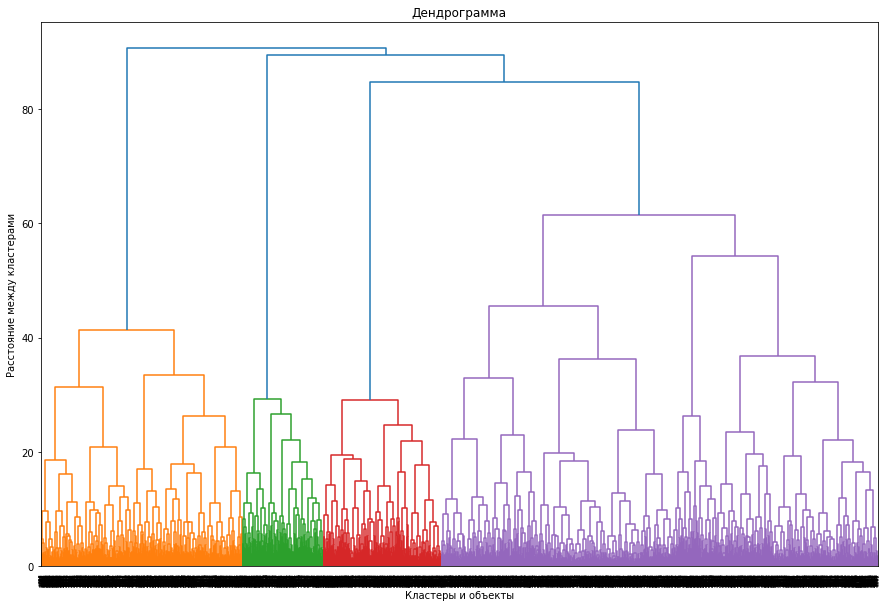

In [39]:
#визуализируем дендрограмму:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма')
plt.xlabel('Кластеры и объекты')
plt.ylabel('Расстояние между кластерами')

plt.show() 

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. 

In [40]:
# задаём модель k_means с числом кластеров 5 
km = KMeans(n_clusters=5, random_state=0)
km.fit(X_sc)

# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels =  km.fit_predict(X_sc)

# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] = labels


Посмотрим на средние значения признаков для кластеров. 

In [41]:
# выводим статистику по средним значениям наших признаков по класте
cluster_means = df.groupby('cluster_km').mean().reset_index()
cluster_means

,cluster_km,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_current_month,Churn
0,0,0.496447,0.995939,0.892386,1.000000,1.0,6.922843,0.524873,29.606091,153.424651,4.283249,1.919520,0.119797
1,1,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.974910,1.597146,0.403226
2,2,0.500940,1.000000,0.217105,0.072368,1.0,2.010338,0.277256,27.583647,119.339956,1.922932,1.203319,0.563910
3,3,0.534260,0.996028,0.379345,0.009930,1.0,6.208540,0.538232,30.699106,176.259567,5.415094,2.324220,0.014896
4,4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839


В таблице видно что кластеры разделились в зависимости от времени с момента первого обращения в фитнес-центр. Также есть видимые различия в периоде контракта. В отдельную группу отнесли людей без телефона. 

Построим распределения признаков для кластеров на графиках. 

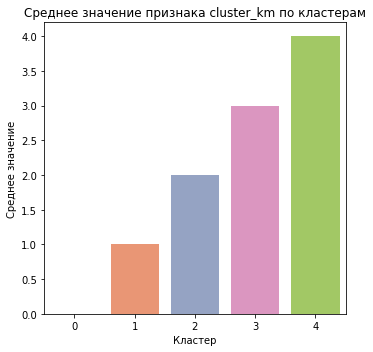

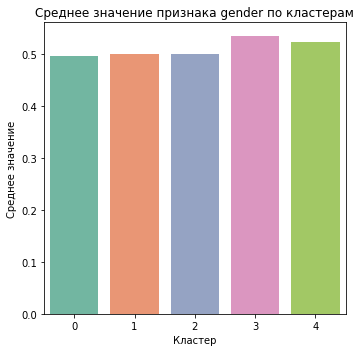

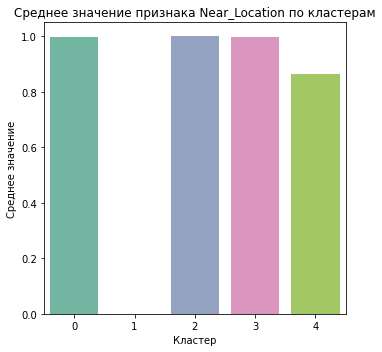

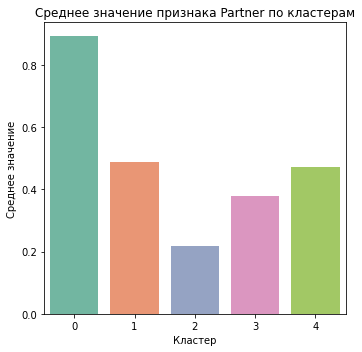

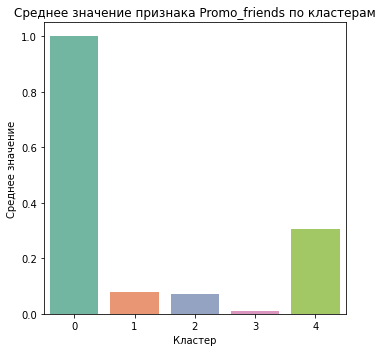

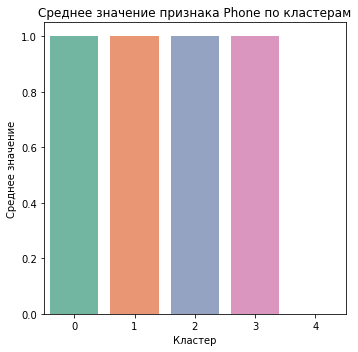

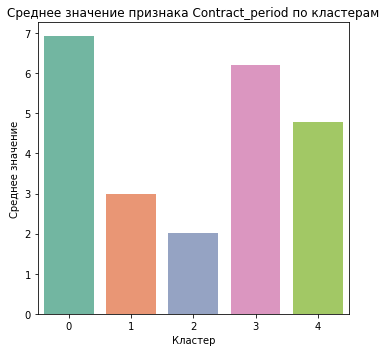

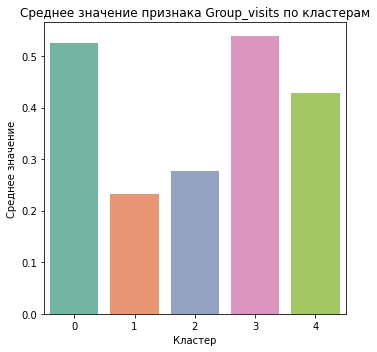

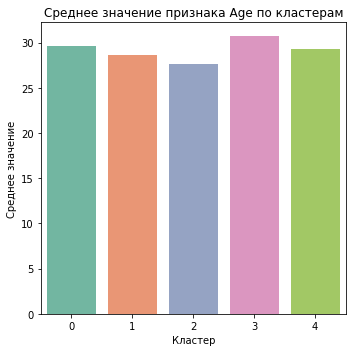

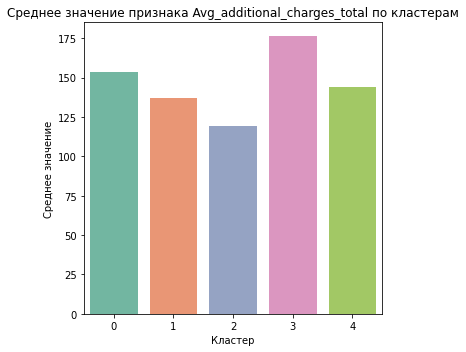

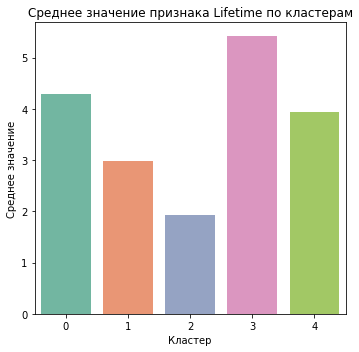

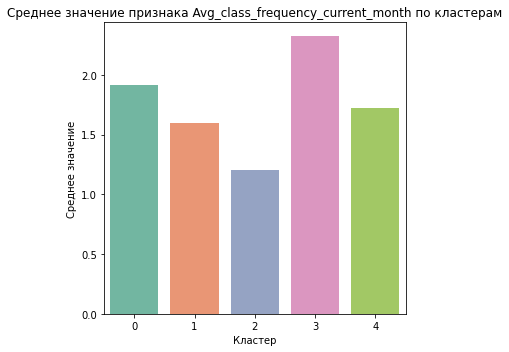

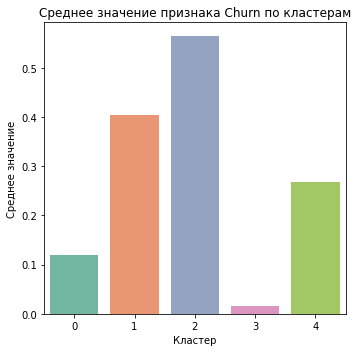

In [43]:
for col in cluster_means.columns:
    plt.figure(figsize=(5, 5))
    sns.barplot(x=cluster_means.index, y=cluster_means[col], palette='Set2')
    plt.title(f'Среднее значение признака {col} по кластерам')
    plt.xlabel('Кластер')
    plt.ylabel('Среднее значение')
    plt.tight_layout()
    plt.show()    

На графиках так же видно, что  кластеры разделились в зависимости от времени с момента первого обращения в фитнес-центр. Также есть видимые различия в периоде контракта. В отдельную группу отнесли людей без телефона. 
Так же видно что отдельно выделяеются те у кого это не ближайшая локация и те кто промо-друзья приобладают в 0 кластере. 
Так же по этому графику уже можно сказать что самоее большое количество клиентов, которое ушло, ноходится в кластерах 1 и 2, а самые надежные клиенты в кластере 3

In [44]:
#выделим отдельно не бинарные признаки:
non_binary_cols = [col for col in df.columns if df[col].nunique() > 2 and col != 'cluster_km']

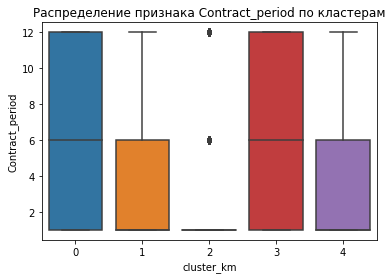

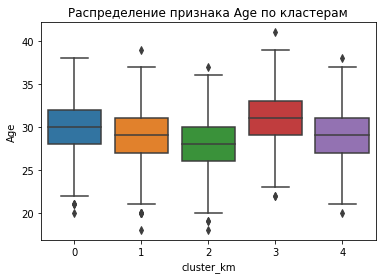

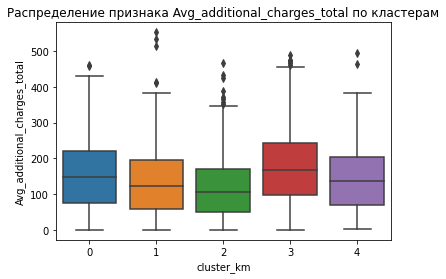

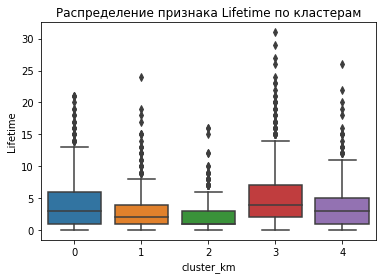

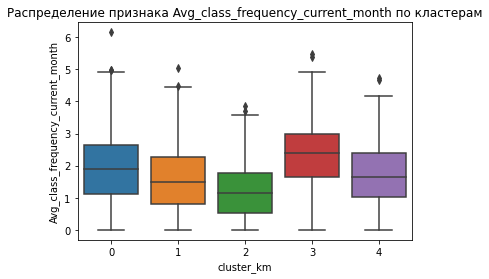

In [45]:
#нарисуем boxplot для каждого признака 
for col in non_binary_cols:
    sns.boxplot(data=df, x='cluster_km', y=col)
    plt.title(f'Распределение признака {col} по кластерам')
    plt.show()

Видно что во втором кластере минимальный период контракта, в 0 и 3 среднее значение 6 месяцев, в 1 и 4 от 1 до 6 месяцев. Средний возраст меньше в 1 и 2 кластере. Большенство новых клиентов также в 1 и 2 кластерах, но тут разница не настолько большая, так как в остальных медиана не привышает 5 мес. Количество посещений в 1 и 2 кластерах тоже снижано по сравнению. с остальными, больше посещений в кластере 3.

Самое большое различие видно в периоде контракта. 

Для каждого полученного кластера посчитаем долю оттока

In [46]:
churn_by_cluster = df.groupby('cluster_km')['Churn'].mean()

#преобразуим в проценты
churn_by_cluster_procent = churn_by_cluster * 100

churn_by_cluster_procent

cluster_km
0    11.979695
1    40.322581
2    56.390977
3     1.489573
4    26.683938
Name: Churn, dtype: float64

В кластере 2 наибольший процент клиентов покинул компанию. Самый надежный кластер 3, всего 1.4% покинули компанию.

## Выводы и базовые рекомендации по работе с клиентами

__Описание данных__

Были проанализированы данные по 4000 клиентам фитнес-клуба. 
В выборке представлены клиенты с контрактами на 1, 6 и 12 месяцев. Основные характеристики клиентов:

    -Более 50% имеют контракт на 1 месяц (короткий срок);
	-Средний возраст клиентов — около 30 лет;
	-Гендерное распределение — примерно поровну мужчин и женщин;
	-Средняя частота посещений — от 1 до 3 раз в неделю.

__Анализ оттока клиентов__

Выяснено, что наибольший отток наблюдается среди следующих групп:

	-Новые клиенты, недавно подписавшие контракт;
	-Клиенты с контрактом на 1 месяц;
	-Более молодые клиенты.

Это говорит о том, что на ранних этапах взаимодействия с клубом существует высокий риск потери клиента, особенно если он изначально выбрал краткосрочный тариф.

__Моделирование оттока__

Были построены две модели прогнозирования оттока клиентов. На основании метрик качества была выбрана модель логистической регрессии, поскольку она показала лучшую способность выявлять действительно ушедших клиентов (высокая recall/чувствительность).

__Кластеризация клиентов__

Клиенты были сегментированы по поведенческим и демографическим признакам. Были выявлены две группы с наибольшим риском оттока:

	•	Эти клиенты имеют самый короткий срок контракта;
	•	Редко посещают групповые занятия;
	•	Недавно стали клиентами клуба;
	•	Возраст — ниже среднего.

Таким образом, молодые новички, не вовлеченные в активные мероприятия клуба и не ориентированные на долгосрочное сотрудничество, наиболее подвержены риску оттока.

__Рекомендации по удержанию клиентов__

	Промо-акции и бонусы для новых клиентов
    
	•	Предлагать скидки или бонусы при переходе с месячного контракта на более длительный.
	•	Вводные бесплатные мероприятия (экскурсии, персональные тренировки).
    
	Повышение вовлеченности
    
	•	Мотивировать посещение групповых занятий — через систему поощрений.
	•	Вовлекать новых клиентов в комьюнити клуба (чаты, мероприятия, акции).
    
	Персонализированная работа с молодыми клиентами
    
	•	Создать сегмент целевой аудитории среди молодежи с адаптированными предложениями.
	•	Обратная связь на раннем этапе — выявление причин низкой активности.
	